# Crime Clustering Analysis
## Comprehensive Analysis with EDA, Dimensionality Reduction, and Multiple Clustering Algorithms

**Author:** Bassem Ben Hamed   
**Machine Learning Training**  

### Objectives:
1. Exploratory Data Analysis (EDA)
2. Dimensionality Reduction: PCA, UMAP, t-SNE
3. K-Means Clustering with Elbow & Silhouette Analysis
4. Cluster Profiling with Decision Tree Rule Extraction
5. Hierarchical Clustering with Dendrogram
6. Gaussian Mixture Model (GMM)

In [3]:
# !pip install umap-learn

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.cluster.hierarchy import dendrogram, linkage
import umap
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print('Libraries imported successfully!')

Libraries imported successfully!


## 1. Data Loading and Preparation

In [5]:
# Load data
df = pd.read_csv('crimes.csv', sep=';')

# Display basic info
print('Dataset Shape:', df.shape)
print('\nFirst 5 rows:')
df.head()

Dataset Shape: (50, 8)

First 5 rows:


,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [6]:
# Data info
print('Dataset Information:')
df.info()
print('\nMissing Values:')
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Etat        50 non-null     object 
 1   Meutre      50 non-null     float64
 2   Rapt        50 non-null     float64
 3   Vol         50 non-null     float64
 4   Attaque     50 non-null     float64
 5   Viol        50 non-null     float64
 6   Larcin      50 non-null     float64
 7   Auto_Theft  50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB

Missing Values:
Etat          0
Meutre        0
Rapt          0
Vol           0
Attaque       0
Viol          0
Larcin        0
Auto_Theft    0
dtype: int64


In [7]:
# Prepare data for clustering
# Note: Column name has a trailing space
states = df['Etat '].values
X = df.drop('Etat ', axis=1).values
feature_names = df.drop('Etat ', axis=1).columns.tolist()
print(f'Number of states: {len(states)}')
print(f'Number of features: {len(feature_names)}')
print(f'Features: {feature_names}')

Number of states: 50
Number of features: 7
Features: ['Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin', 'Auto_Theft']


## 2. Exploratory Data Analysis (EDA)

In [8]:
# Statistical summary
print('Statistical Summary:')
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Meutre,50.0,7.444,3.866769,0.9,4.225,7.30,10.100,15.8
Rapt,50.0,25.734,10.759630,9.0,18.325,24.10,32.525,51.6
Vol,50.0,124.092,88.348567,13.3,64.950,106.05,155.850,472.6
Attaque,50.0,211.300,100.253049,43.8,148.850,197.60,282.575,485.3
Viol,50.0,1291.904,432.455711,446.1,1000.075,1265.05,1529.825,2453.1
Larcin,50.0,2671.288,725.908707,1239.9,2248.900,2617.45,3007.600,4467.4
Auto_Theft,50.0,377.526,193.394418,144.4,245.775,333.85,460.125,1140.1


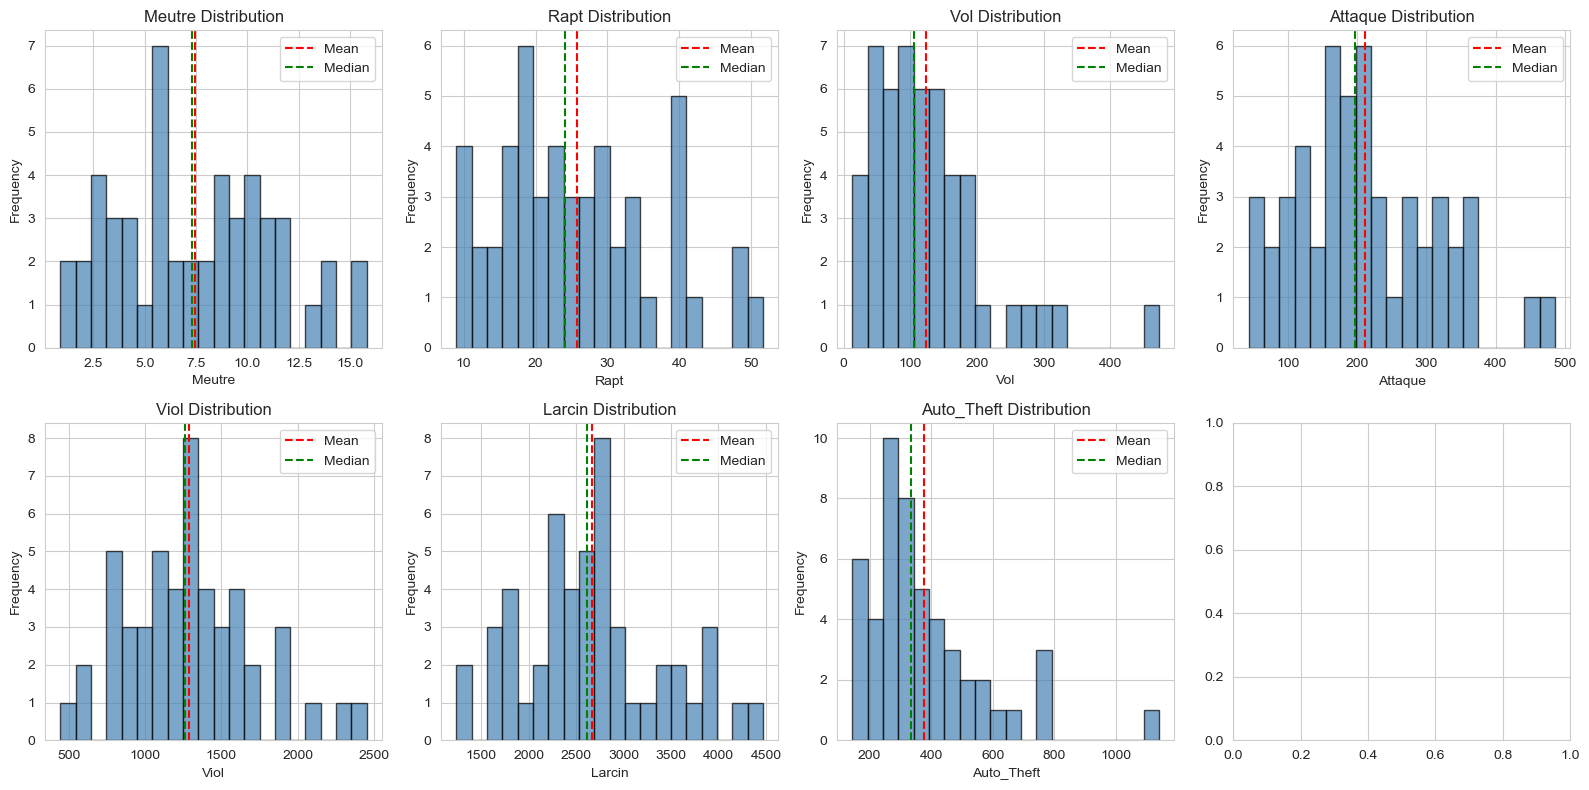

In [9]:
# Distribution plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(feature_names):
    axes[idx].hist(df[col], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[idx].legend()

plt.tight_layout()
plt.show()

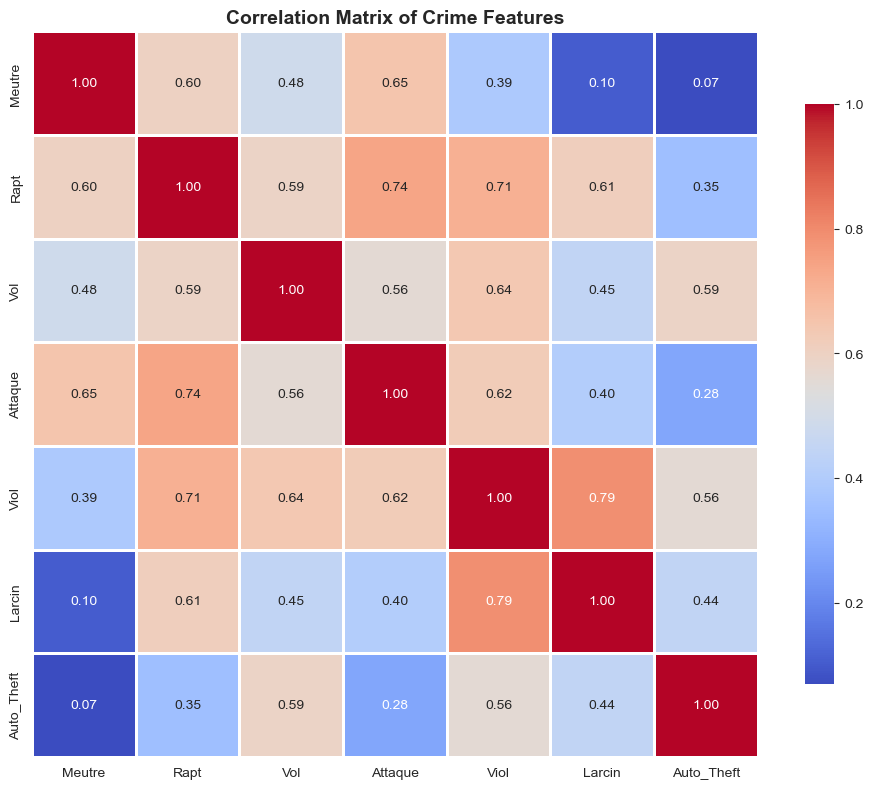

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Crime Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

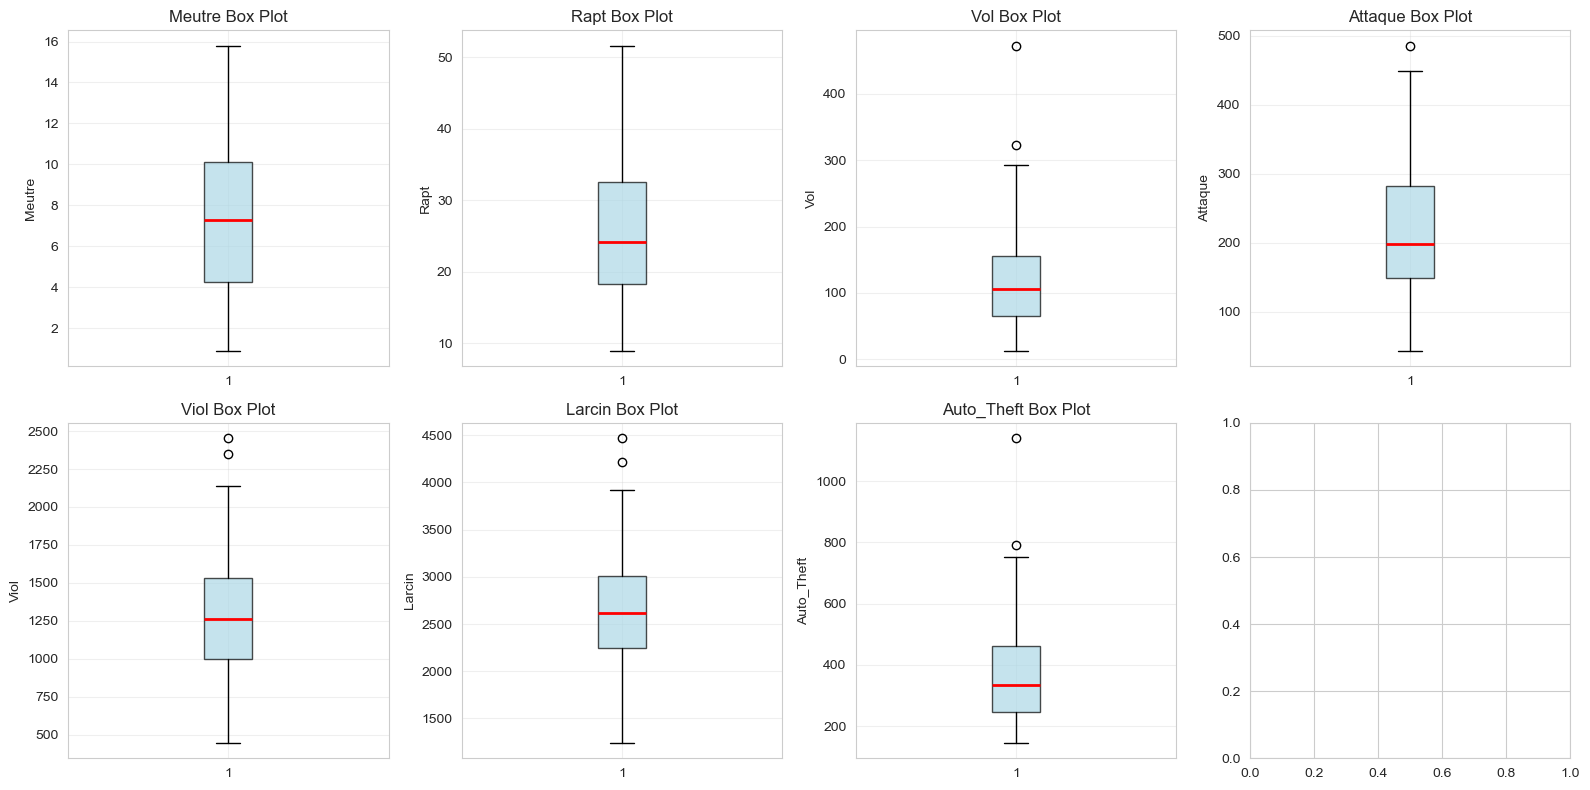

In [11]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(feature_names):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col} Box Plot')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

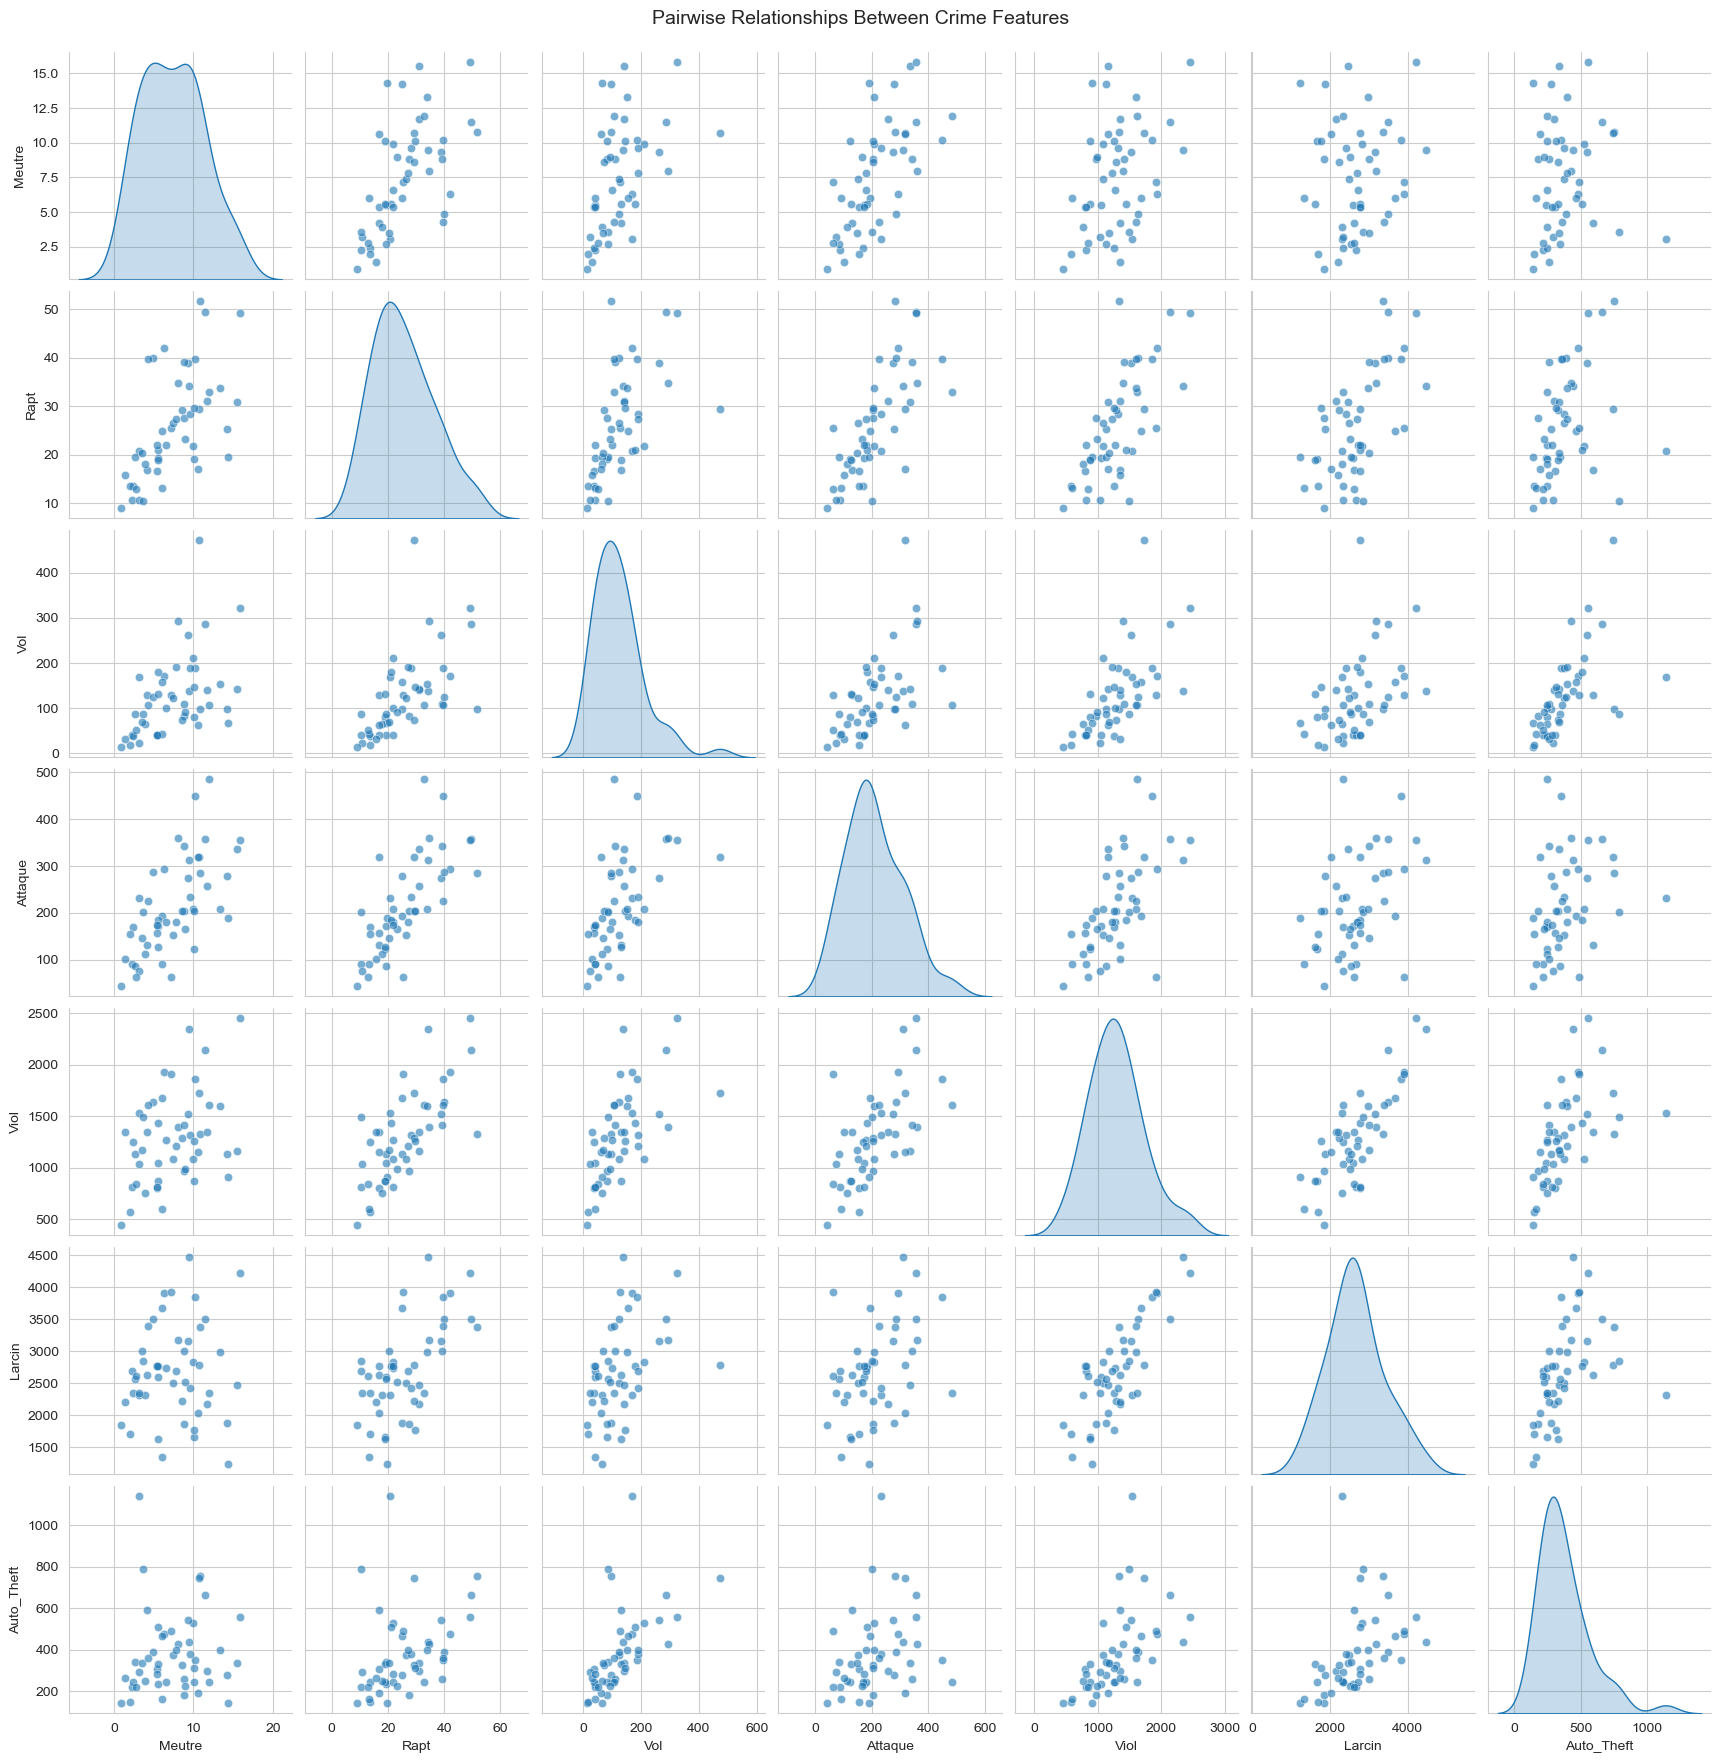

In [12]:
# Pairplot for relationships
sns.pairplot(df[feature_names], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Crime Features', y=1.01, fontsize=14)
plt.show()

In [13]:
# Standardize data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Data standardized successfully!')
print(f'Scaled data shape: {X_scaled.shape}')
print(f'Mean: {X_scaled.mean():.4f}, Std: {X_scaled.std():.4f}')

Data standardized successfully!
Scaled data shape: (50, 7)
Mean: -0.0000, Std: 1.0000


## 3. Dimensionality Reduction Visualizations

### 3.1 PCA (Principal Component Analysis)

Explained variance ratio: [0.58785136 0.17696026]
Total explained variance: 0.7648


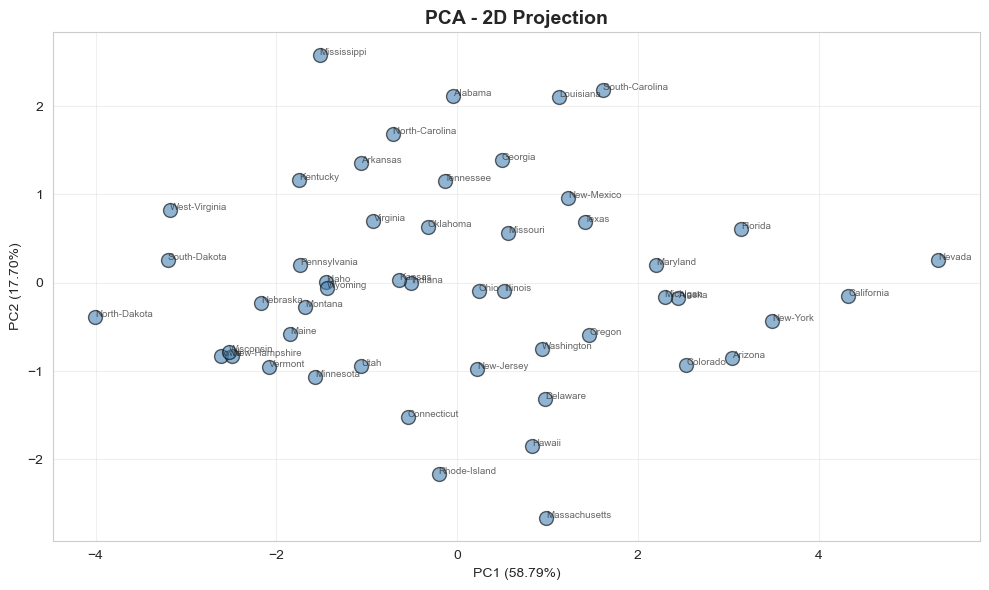

In [14]:
# PCA - 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f'Explained variance ratio: {pca_2d.explained_variance_ratio_}')
print(f'Total explained variance: {pca_2d.explained_variance_ratio_.sum():.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c='steelblue', s=100, alpha=0.6, edgecolors='black')
for i, state in enumerate(states):
    plt.annotate(state, (X_pca_2d[i, 0], X_pca_2d[i, 1]), fontsize=7, alpha=0.7)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
plt.title('PCA - 2D Projection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

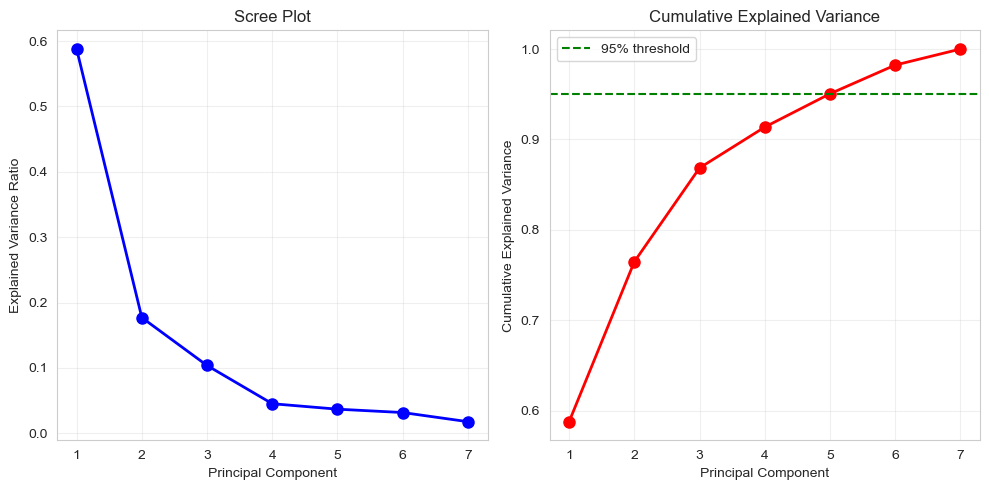

In [15]:
# PCA - Scree plot
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 'ro-', linewidth=2, markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 UMAP (Uniform Manifold Approximation and Projection)

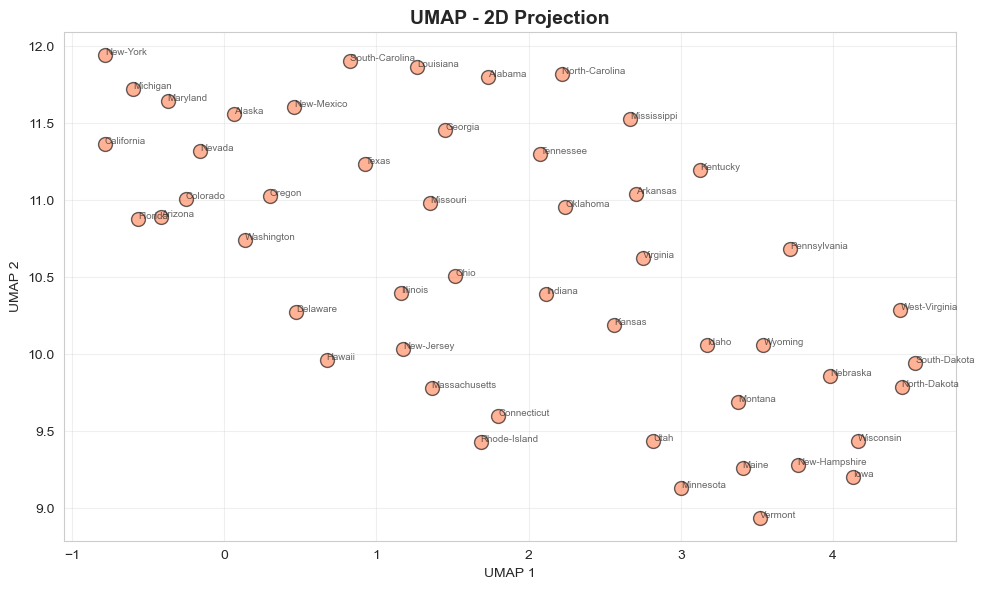

In [16]:
# UMAP - 2D
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c='coral', s=100, alpha=0.6, edgecolors='black')
for i, state in enumerate(states):
    plt.annotate(state, (X_umap[i, 0], X_umap[i, 1]), fontsize=7, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP - 2D Projection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 t-SNE (t-Distributed Stochastic Neighbor Embedding)

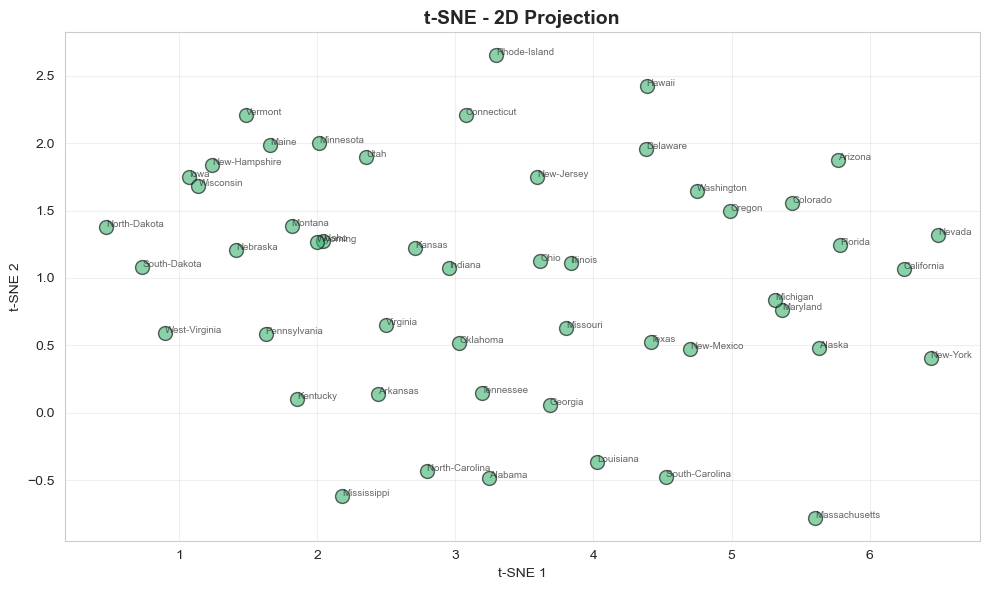

In [17]:
# t-SNE - 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='mediumseagreen', s=100, alpha=0.6, edgecolors='black')
for i, state in enumerate(states):
    plt.annotate(state, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=7, alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE - 2D Projection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. K-Means Clustering

### 4.1 Elbow Method

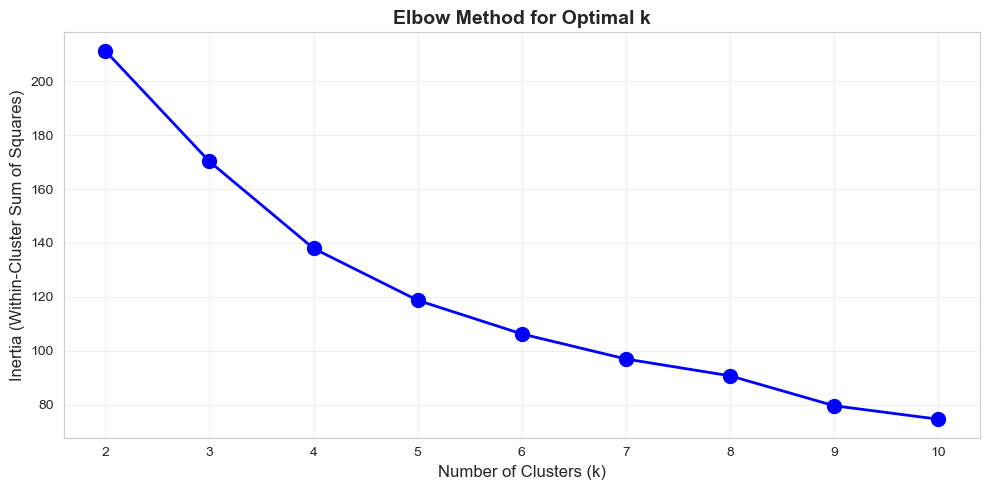

In [18]:
# Elbow method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

In [22]:
# !pip install kneed

In [23]:
# Automatic elbow detection with KneeLocator
from kneed import KneeLocator
# Find the elbow point
kl = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
optimal_k_elbow = kl.elbow
print(f'Optimal k detected by KneeLocator: {optimal_k_elbow}')

Optimal k detected by KneeLocator: 5


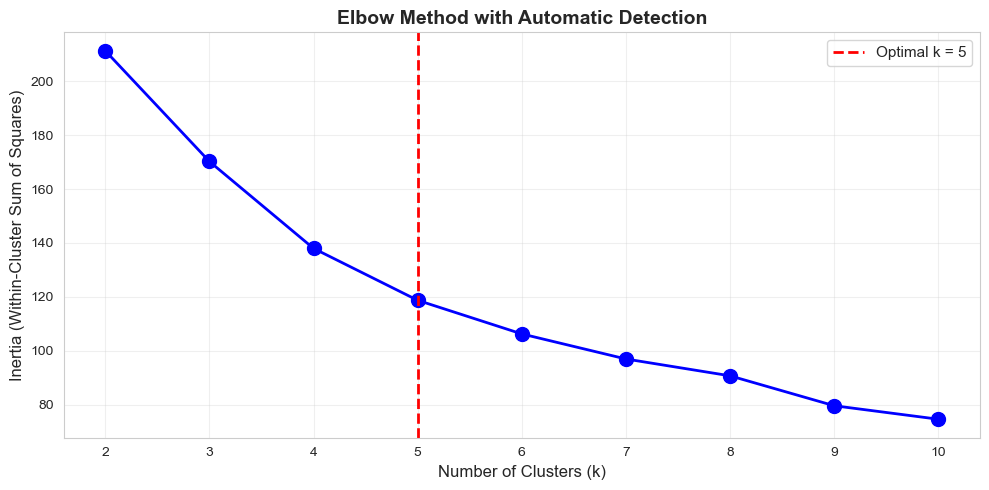

In [24]:
# Visualize with the detected elbow point
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', linewidth=2, 
            label=f'Optimal k = {optimal_k_elbow}')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method with Automatic Detection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

### 4.2 Silhouette Score Analysis

k=2: Silhouette Score = 0.3206
k=3: Silhouette Score = 0.2568
k=4: Silhouette Score = 0.2836
k=5: Silhouette Score = 0.2792
k=6: Silhouette Score = 0.2642
k=7: Silhouette Score = 0.2261
k=8: Silhouette Score = 0.2231
k=9: Silhouette Score = 0.1911
k=10: Silhouette Score = 0.1971


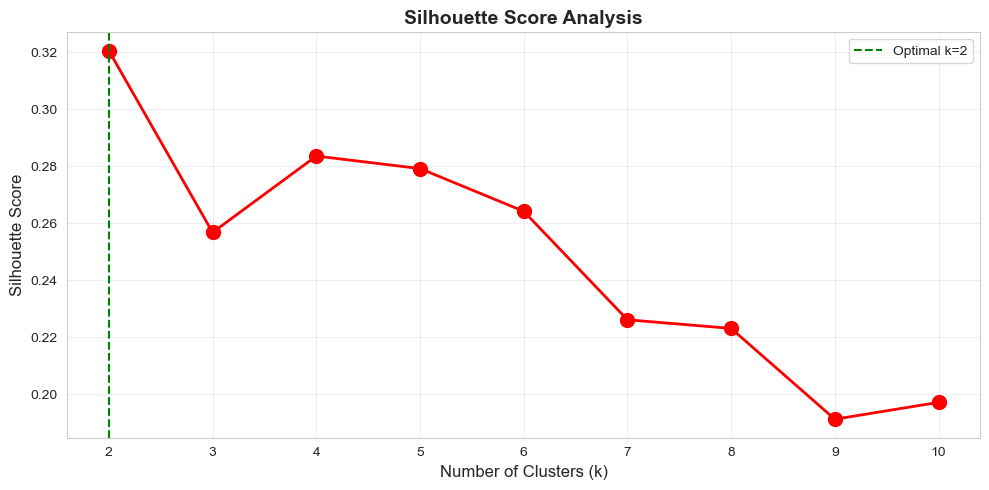


Optimal number of clusters: 2


In [25]:
# Silhouette scores
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f'k={k}: Silhouette Score = {score:.4f}')

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
optimal_k = K_range[np.argmax(silhouette_scores)]
plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f'\nOptimal number of clusters: {optimal_k}')

### 4.3 Final K-Means Model

In [26]:
# Fit final K-Means model
optimal_k = 4  # Based on analysis above
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

print(f'K-Means with k={optimal_k}')
print(f'Inertia: {kmeans_final.inertia_:.2f}')
print(f'Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}')
print(f'\nCluster sizes:')
unique, counts = np.unique(kmeans_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f'  Cluster {cluster}: {count} states')

K-Means with k=4
Inertia: 138.00
Silhouette Score: 0.2836

Cluster sizes:
  Cluster 0: 11 states
  Cluster 1: 16 states
  Cluster 2: 17 states
  Cluster 3: 6 states


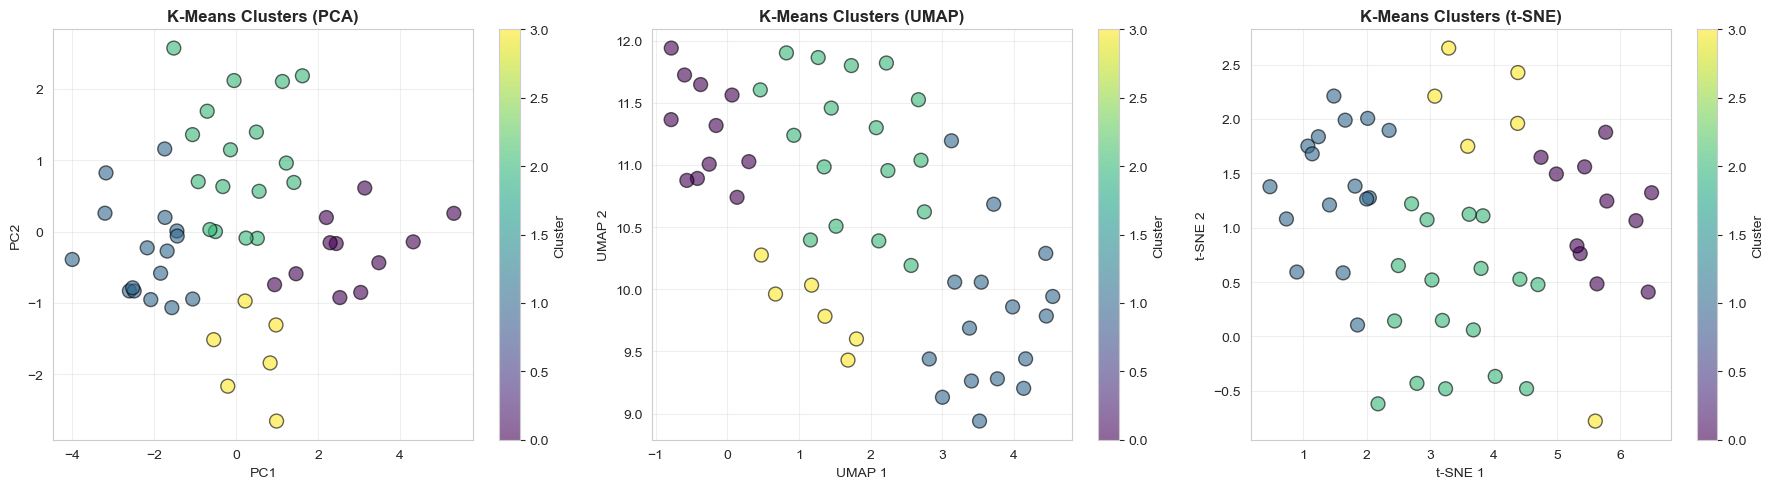

In [27]:
# Visualize K-Means clusters on reduced dimensions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels, 
                          cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('K-Means Clusters (PCA)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# UMAP
scatter2 = axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, 
                          cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].set_title('K-Means Clusters (UMAP)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# t-SNE
scatter3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, 
                          cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[2].set_xlabel('t-SNE 1')
axes[2].set_ylabel('t-SNE 2')
axes[2].set_title('K-Means Clusters (t-SNE)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

## 5. Cluster Profiling with Centroids

In [28]:
# Extract centroids and create profile
centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Create DataFrame for centroids
centroids_df = pd.DataFrame(centroids_original, columns=feature_names)
centroids_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print('Cluster Centroids (Original Scale):')
centroids_df

Cluster Centroids (Original Scale):


,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Cluster 0,9.209091,40.772727,223.690909,319.600000,1814.372727,3573.181818,519.363636
Cluster 1,3.943750,15.831250,50.550000,118.212500,899.981250,2274.700000,252.231250
Cluster 2,10.476471,27.376471,122.629412,244.129412,1225.870588,2336.164706,302.058824
Cluster 3,4.950000,19.916667,141.750000,167.966667,1566.266667,3024.900000,665.433333


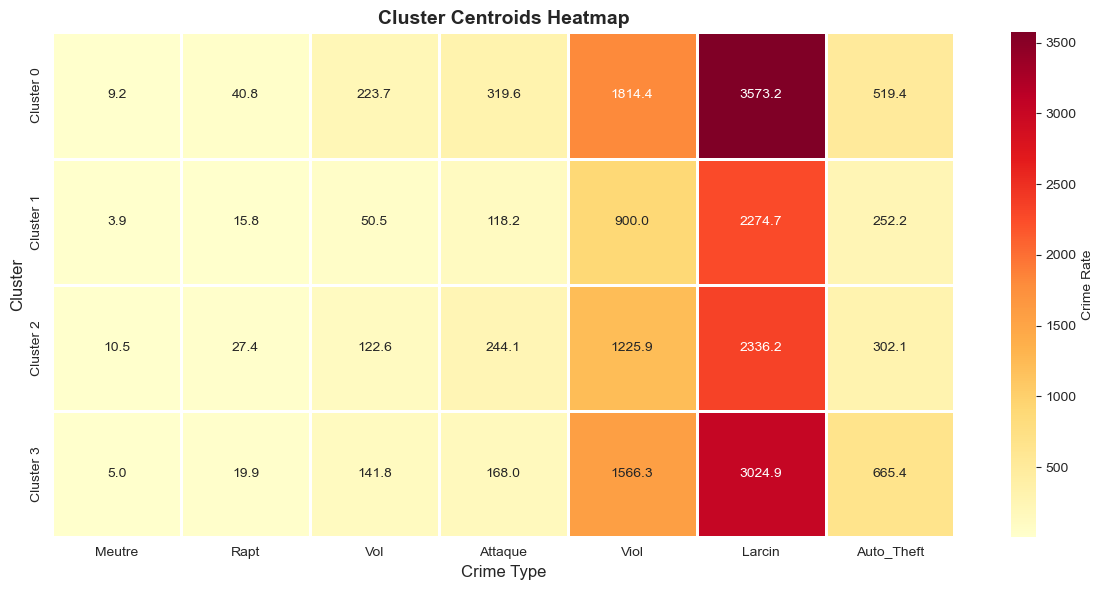

In [29]:
# Heatmap of centroids
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df, annot=True, fmt='.1f', cmap='YlOrRd', 
            linewidths=1, cbar_kws={'label': 'Crime Rate'})
plt.title('Cluster Centroids Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
# Detailed cluster profiles
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = kmeans_labels

print('Cluster Profiles:\n')
for cluster in range(optimal_k):
    print(f'\n=== CLUSTER {cluster} ===')
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    print(f'States: {cluster_data["Etat "].tolist()}')
    print(f'\nStatistics:')
    print(cluster_data[feature_names].describe().loc[['mean', 'std']])

Cluster Profiles:


=== CLUSTER 0 ===
States: ['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Maryland', 'Michigan', 'Nevada', 'New-York', 'Oregon', 'Washington']

Statistics:
        Meutre       Rapt         Vol     Attaque         Viol       Larcin  \
mean  9.209091  40.772727  223.690909  319.600000  1814.372727  3573.181818   
std   3.272753   6.911887  115.415410   59.293828   372.222031   492.820843   

      Auto_Theft  
mean  519.363636  
std   146.969175  

=== CLUSTER 1 ===
States: ['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New-Hampshire', 'North-Dakota', 'Pennsylvania', 'South-Dakota', 'Utah', 'Vermont', 'West-Virginia', 'Wisconsin', 'Wyoming']

Statistics:
        Meutre       Rapt        Vol     Attaque        Viol       Larcin  \
mean  3.943750  15.831250  50.550000  118.212500  899.981250  2274.700000   
std   2.305636   3.969671  29.815745   41.478185  251.874144   496.479169   

      Auto_Theft  
mean   252.23125  
std    

In [31]:
import os
# Export cluster results to CSV
# 1. Export states with their cluster assignments
df_with_clusters.to_csv('cluster_assignments.csv', index=False)
print('✅ Cluster assignments exported to: cluster_assignments.csv')

# 2. Export cluster centroids
centroids_df.to_csv('cluster_centroids.csv')
print('✅ Cluster centroids exported to: cluster_centroids.csv')

# 3. Export detailed statistics for each cluster
cluster_stats = []
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    stats = cluster_data[feature_names].describe().T
    stats['Cluster'] = cluster
    stats['Num_States'] = len(cluster_data)
    cluster_stats.append(stats)

cluster_statistics = pd.concat(cluster_stats, keys=range(optimal_k))
cluster_statistics.to_csv('cluster_statistics.csv')
print('✅ Cluster statistics exported to: cluster_statistics.csv')

# 4. Export summary comparison
summary_df = pd.DataFrame({
    'Cluster': range(optimal_k),
    'Num_States': [len(df_with_clusters[df_with_clusters['Cluster'] == i]) for i in range(optimal_k)],
    'States': [', '.join(df_with_clusters[df_with_clusters['Cluster'] == i]['Etat '].tolist()) for i in range(optimal_k)]
})
summary_df.to_csv('cluster_summary.csv', index=False)
print('✅ Cluster summary exported to: cluster_summary.csv')

print('\n📊 All results exported successfully!')
print(f'Files created in: {os.getcwd()}')

✅ Cluster assignments exported to: cluster_assignments.csv
✅ Cluster centroids exported to: cluster_centroids.csv
✅ Cluster statistics exported to: cluster_statistics.csv
✅ Cluster summary exported to: cluster_summary.csv

📊 All results exported successfully!
Files created in: /Users/bassembenhamed/Desktop/ML EY Clevory/Crimes Clustering


# Rapport de Profiling : Analyse des Clusters de Criminalité aux USA

## 1. Résumé Exécutif
Ce rapport présente les résultats d'une segmentation (clustering K-Means) effectuée sur des données de criminalité par État aux USA. L'analyse a permis d'identifier **4 profils distincts**, révélant une forte disparité géographique et typologique (violence physique vs crimes contre les biens).

## 2. Méthodologie
* **Algorithme :** K-Means Clustering (k=4).
* **Données :** Statistiques de criminalité normalisées par population (taux pour 100 000 habitants).
* **Variables :** Meurtre, Rapt, Vol (Robbery), Attaque (Agression), "Viol" (interprété comme Cambriolage/Burglary vu les volumes), Larcin, Vol de voiture.

## 3. Analyse des Profils (Clusters)

### Cluster 0 : Zones à Forte Criminalité Urbaine
* **États représentatifs :** *Californie, Floride, New-York, Nevada, Arizona.*
* **Profil :** Ce groupe présente les indicateurs les plus alarmants. Il cumule une forte violence interpersonnelle et les taux les plus élevés de criminalité économique.
* **Chiffres clés (Moyennes) :**
    * Larcin : **~3573** (Le plus élevé)
    * Vol de voiture : **~519**
    * Agressions : **~320**
* **Interprétation :** Zones denses, urbanisées et touristiques, favorisant l'opportunité criminelle.

### Cluster 1 : Zones Rurales et Sûres
* **États représentatifs :** *Dakota du Nord/Sud, Vermont, Iowa, New-Hampshire, Wisconsin.*
* **Profil :** Le groupe le plus sécuritaire des États-Unis. Tous les indicateurs sont au minimum.
* **Chiffres clés (Moyennes) :**
    * Meurtre : **~3.9** (Le plus faible)
    * Agressions : **~118**
* **Interprétation :** États ruraux ou à faible densité de population, principalement dans le Midwest et le Nord.

### Cluster 2 : Le "Sud Profond" (Violence Spécifique)
* **États représentatifs :** *Louisiane, Mississippi, Géorgie, Alabama, Texas.*
* **Profil :** Un profil atypique caractérisé par une violence physique extrême mais une délinquance d'appropriation (vols) modérée.
* **Chiffres clés (Moyennes) :**
    * Meurtre : **~10.5** (Le record national)
    * Larcin : ~2336 (Niveau modéré, proche du Cluster 1)
* **Interprétation :** Correspond aux États du Sud ("Sun Belt"), où la criminalité violente est historiquement plus prégnante que la délinquance acquisitive urbaine.

### Cluster 3 : Zones Résidentielles Modérées (Nord-Est)
* **États représentatifs :** *Connecticut, Massachusetts, New-Jersey, Rhode-Island.*
* **Profil :** Criminalité intermédiaire. Ces États sont peu touchés par les crimes de sang (meurtres/rapts faibles) mais conservent un niveau moyen de vols et cambriolages.
* **Interprétation :** Zones riches et résidentielles, souvent dans le Nord-Est, bénéficiant d'une bonne sécurité publique.

## 4. Tableau Comparatif des Moyennes

| Indicateur | Cluster 0 (Urbain/Danger) | Cluster 1 (Rural/Sûr) | Cluster 2 (Sud/Violent) | Cluster 3 (Modéré) |
| :--- | :--- | :--- | :--- | :--- |
| **Meurtre** | 9.2 | **3.9** | **10.5** | 5.0 |
| **Rapt** | **40.8** | 15.8 | 27.4 | 18.6 |
| **Attaque** | **319.6** | 118.2 | 244.1 | 160.8 |
| **Cambriolage ("Viol")**| **1814** | 900 | 1226 | 1205 |
| **Larcin** | **3573** | 2275 | 2336 | 2772 |
| **Vol Auto** | **519** | 252 | 302 | 448 |

## 5. Conclusion
L'analyse met en évidence une **fracture claire** entre :
1.  Une criminalité de **masse et d'opportunité** (Cluster 0 - Grandes Métropoles).
2.  Une criminalité de **violence spécifique** (Cluster 2 - Sud).
3.  Des havres de **paix relative** (Cluster 1 - Rural).

Les politiques de prévention devraient être adaptées : lutte contre les réseaux et vols dans le Cluster 0, contre la violence interpersonnelle dans le Cluster 2.

## 6. Decision Tree for Rule Extraction

In [32]:
# Train decision tree using cluster labels
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_split=3)
dt_classifier.fit(X, kmeans_labels)

# Accuracy
accuracy = dt_classifier.score(X_scaled, kmeans_labels)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nFeature Importance:')
print(feature_importance)

Decision Tree Accuracy: 0.3200

Feature Importance:
      Feature  Importance
5      Larcin    0.315635
3     Attaque    0.312199
0      Meutre    0.132274
2         Vol    0.100111
4        Viol    0.089220
1        Rapt    0.050561
6  Auto_Theft    0.000000


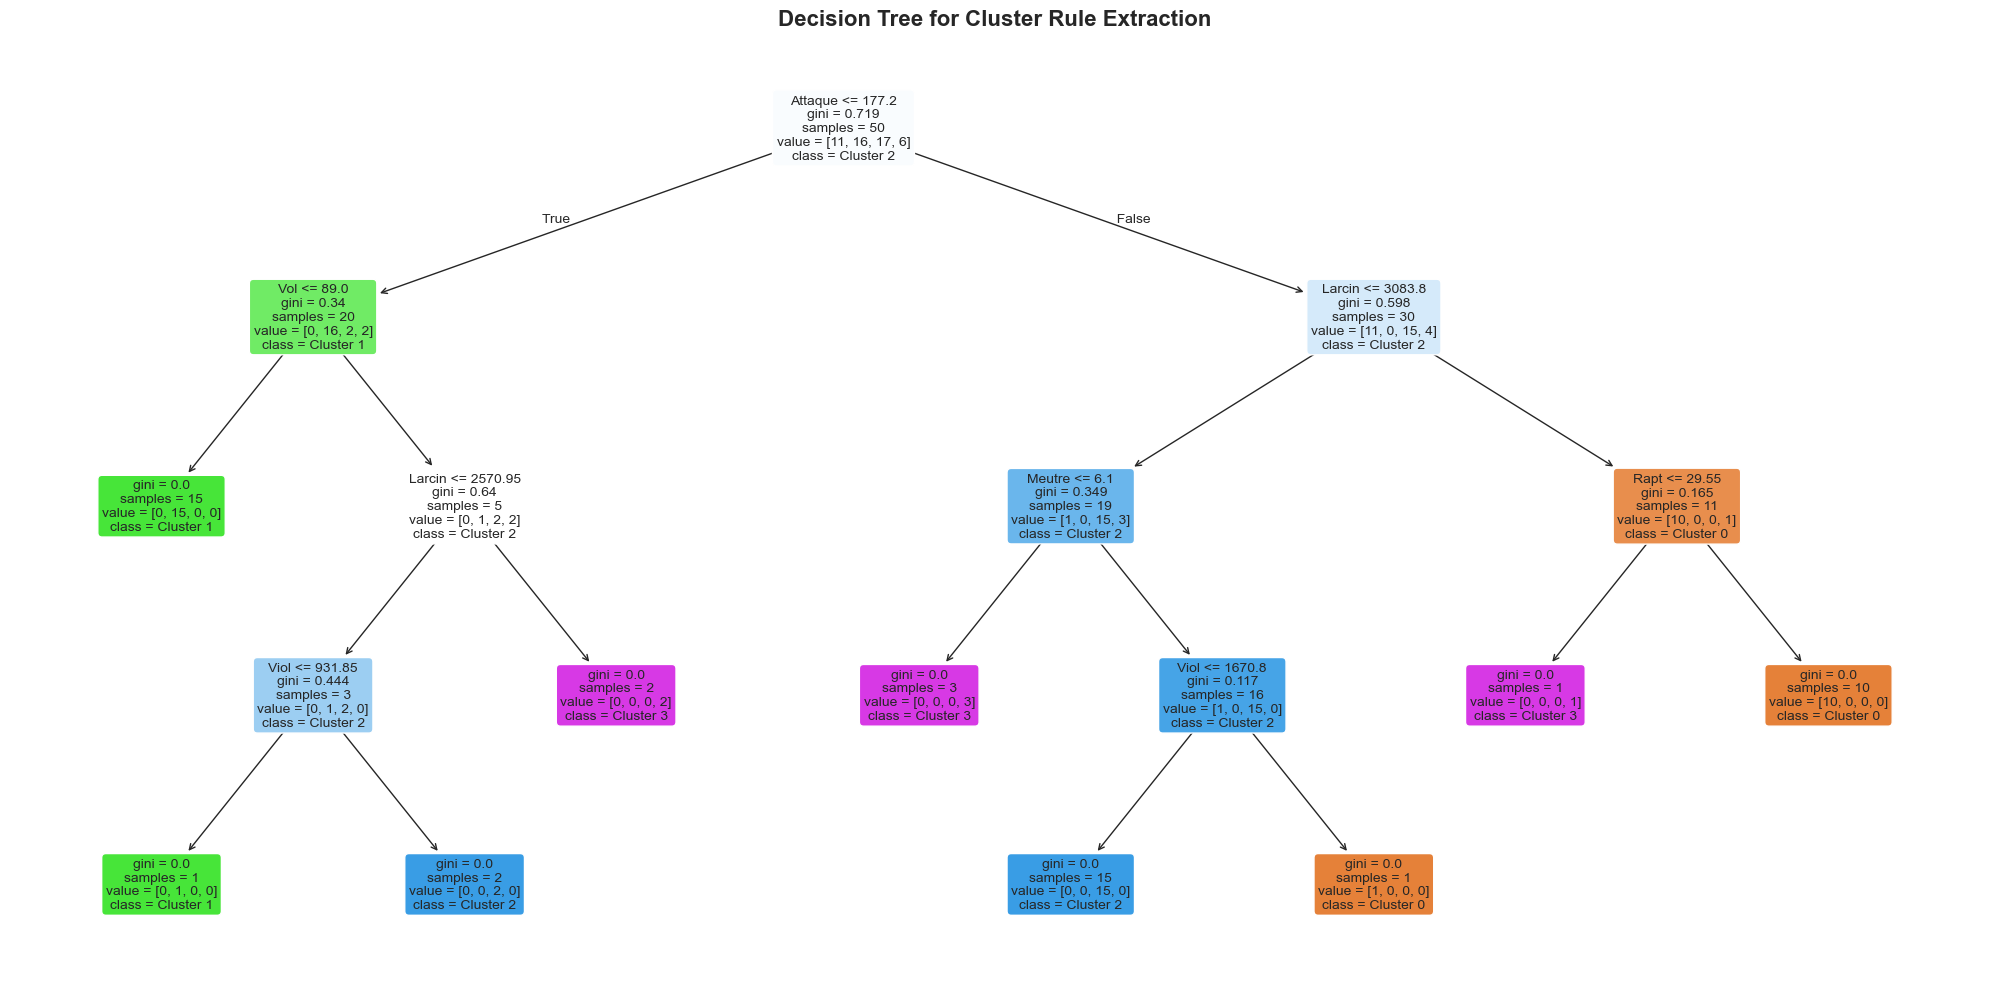

In [33]:
# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=feature_names, 
          class_names=[f'Cluster {i}' for i in range(optimal_k)],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Cluster Rule Extraction', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

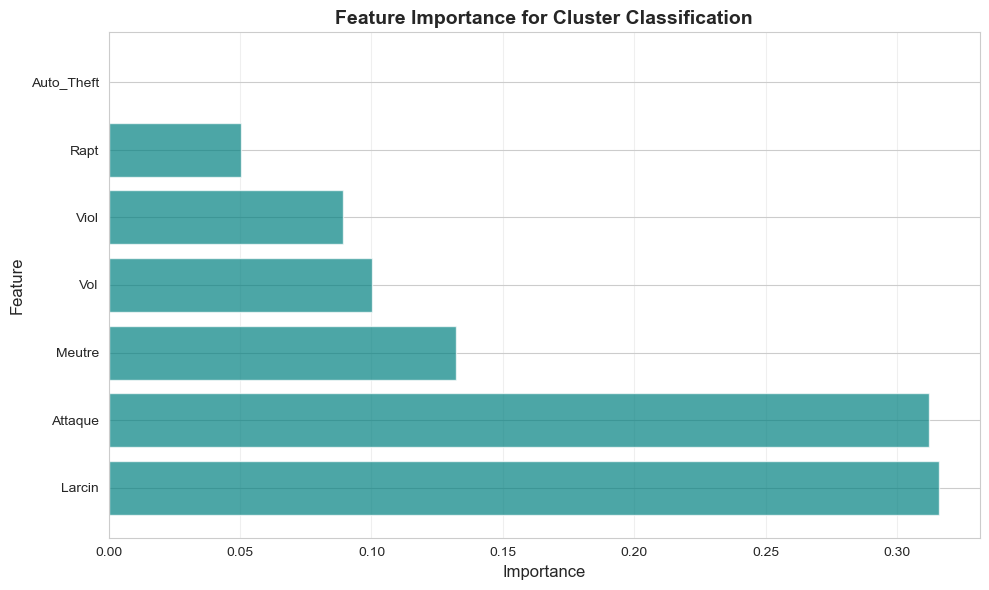

In [34]:
# Feature importance bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal', alpha=0.7)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance for Cluster Classification', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Hierarchical Clustering

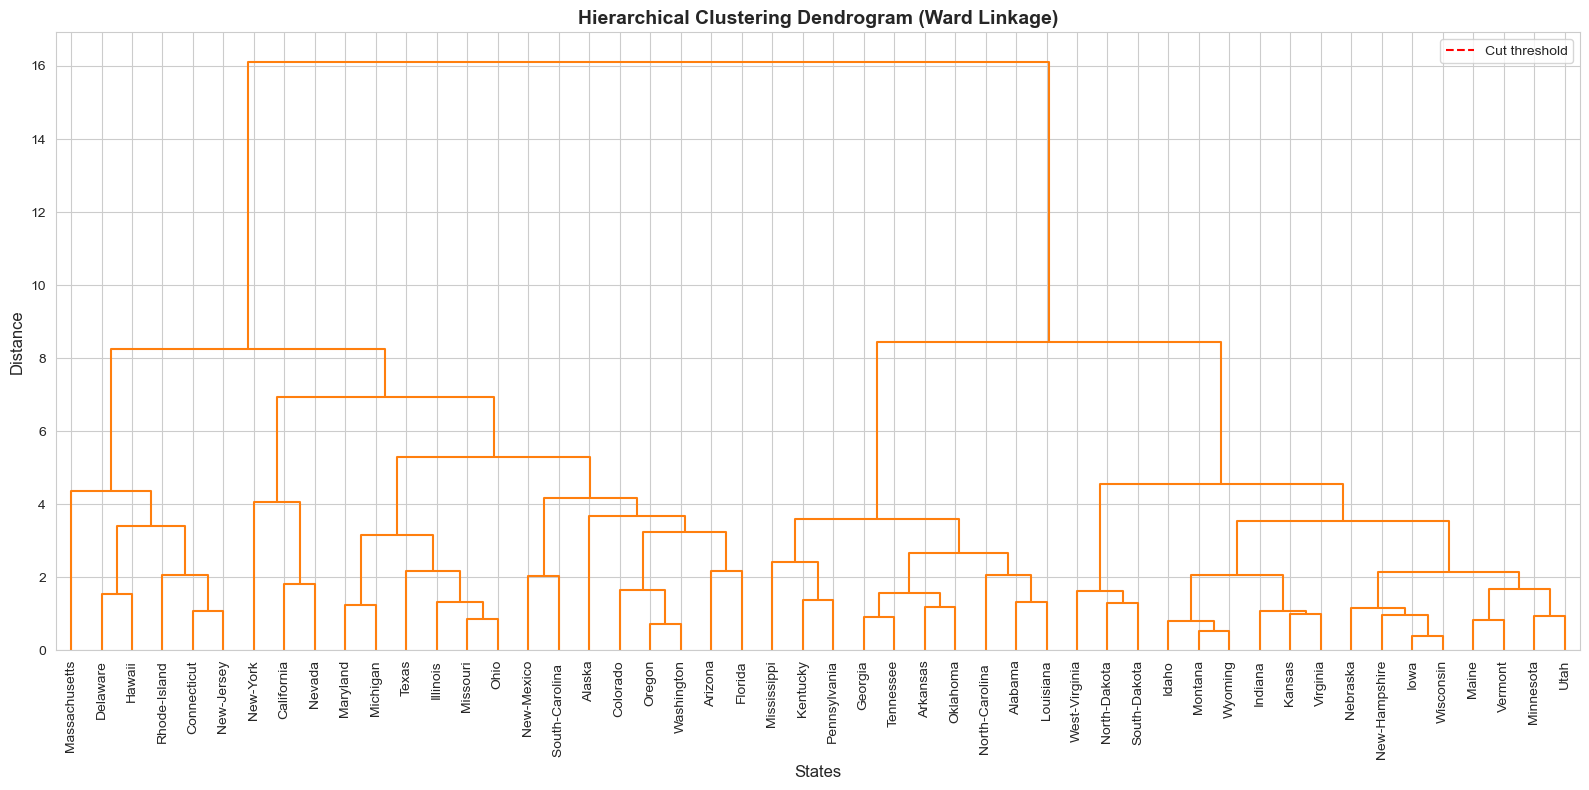

In [35]:
# Compute linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, labels=states, leaf_font_size=10, color_threshold=50)
plt.xlabel('States', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.axhline(y=50, color='r', linestyle='--', label='Cut threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Fit hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

print(f'Hierarchical Clustering with {optimal_k} clusters')
print(f'Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.4f}')
print(f'\nCluster sizes:')
unique, counts = np.unique(hierarchical_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f'  Cluster {cluster}: {count} states')

Hierarchical Clustering with 4 clusters
Silhouette Score: 0.2330

Cluster sizes:
  Cluster 0: 17 states
  Cluster 1: 17 states
  Cluster 2: 10 states
  Cluster 3: 6 states


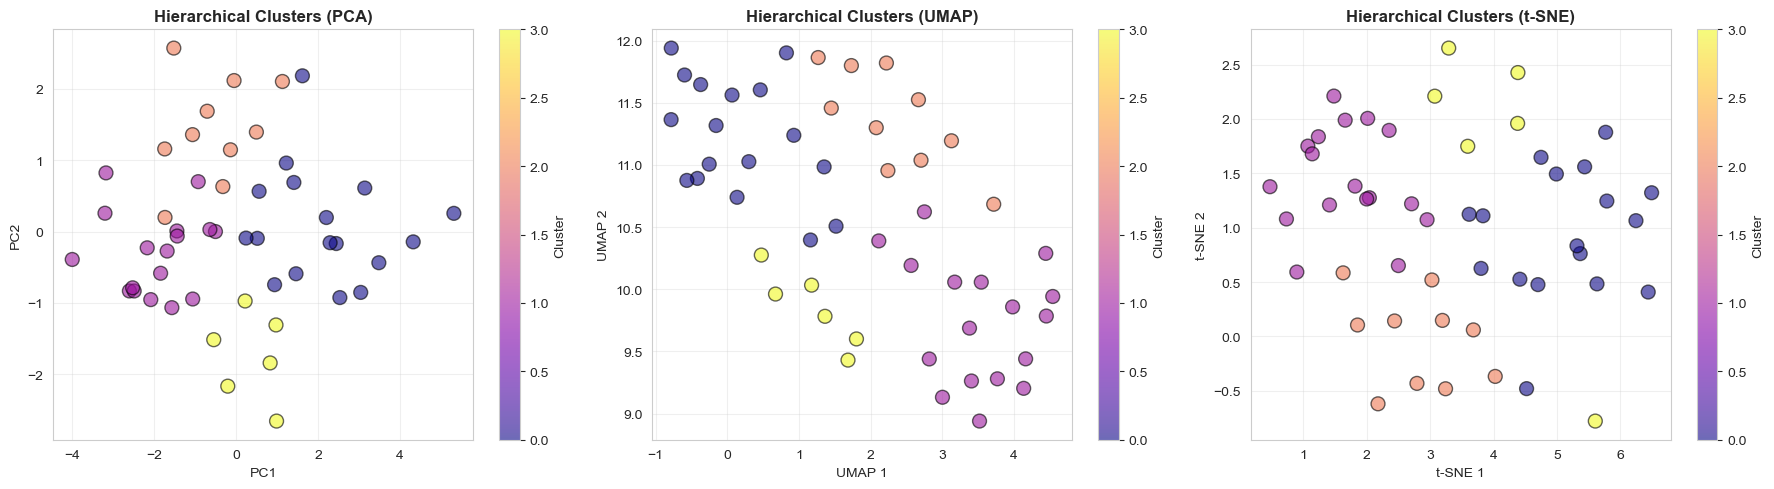

In [37]:
# Visualize hierarchical clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=hierarchical_labels, 
                          cmap='plasma', s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Hierarchical Clusters (PCA)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# UMAP
scatter2 = axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=hierarchical_labels, 
                          cmap='plasma', s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].set_title('Hierarchical Clusters (UMAP)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# t-SNE
scatter3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchical_labels, 
                          cmap='plasma', s=100, alpha=0.6, edgecolors='black')
axes[2].set_xlabel('t-SNE 1')
axes[2].set_ylabel('t-SNE 2')
axes[2].set_title('Hierarchical Clusters (t-SNE)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

## 8. Gaussian Mixture Model (GMM)

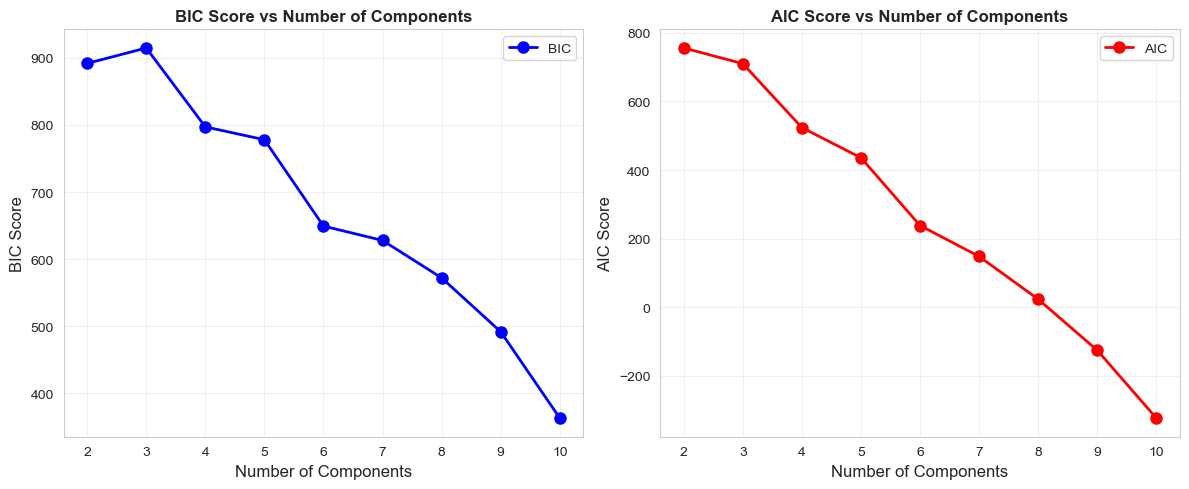

Optimal number of components (BIC): 10


In [38]:
# BIC and AIC scores for model selection
bic_scores = []
aic_scores = []

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, bic_scores, 'bo-', linewidth=2, markersize=8, label='BIC')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('BIC Score', fontsize=12)
plt.title('BIC Score vs Number of Components', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(K_range, aic_scores, 'ro-', linewidth=2, markersize=8, label='AIC')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('AIC Score', fontsize=12)
plt.title('AIC Score vs Number of Components', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.legend()

plt.tight_layout()
plt.show()

optimal_gmm_k = K_range[np.argmin(bic_scores)]
print(f'Optimal number of components (BIC): {optimal_gmm_k}')

In [39]:
# Fit GMM
gmm_final = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10)
gmm_labels = gmm_final.fit_predict(X_scaled)
gmm_probs = gmm_final.predict_proba(X_scaled)

print(f'GMM with {optimal_k} components')
print(f'Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.4f}')
print(f'BIC: {gmm_final.bic(X_scaled):.2f}')
print(f'AIC: {gmm_final.aic(X_scaled):.2f}')
print(f'\nCluster sizes:')
unique, counts = np.unique(gmm_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f'  Cluster {cluster}: {count} states')

GMM with 4 components
Silhouette Score: 0.2114
BIC: 797.22
AIC: 523.80

Cluster sizes:
  Cluster 0: 15 states
  Cluster 1: 24 states
  Cluster 2: 4 states
  Cluster 3: 7 states


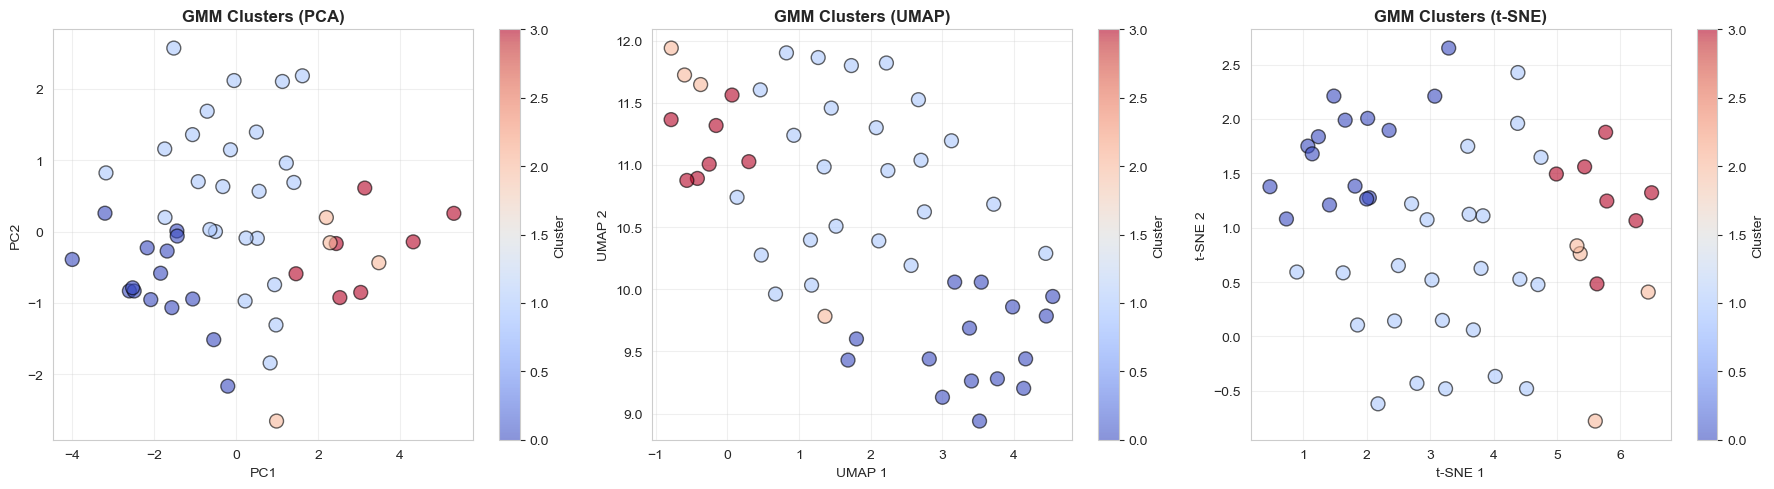

In [40]:
# Visualize GMM clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=gmm_labels, 
                          cmap='coolwarm', s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('GMM Clusters (PCA)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# UMAP
scatter2 = axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=gmm_labels, 
                          cmap='coolwarm', s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].set_title('GMM Clusters (UMAP)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# t-SNE
scatter3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, 
                          cmap='coolwarm', s=100, alpha=0.6, edgecolors='black')
axes[2].set_xlabel('t-SNE 1')
axes[2].set_ylabel('t-SNE 2')
axes[2].set_title('GMM Clusters (t-SNE)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

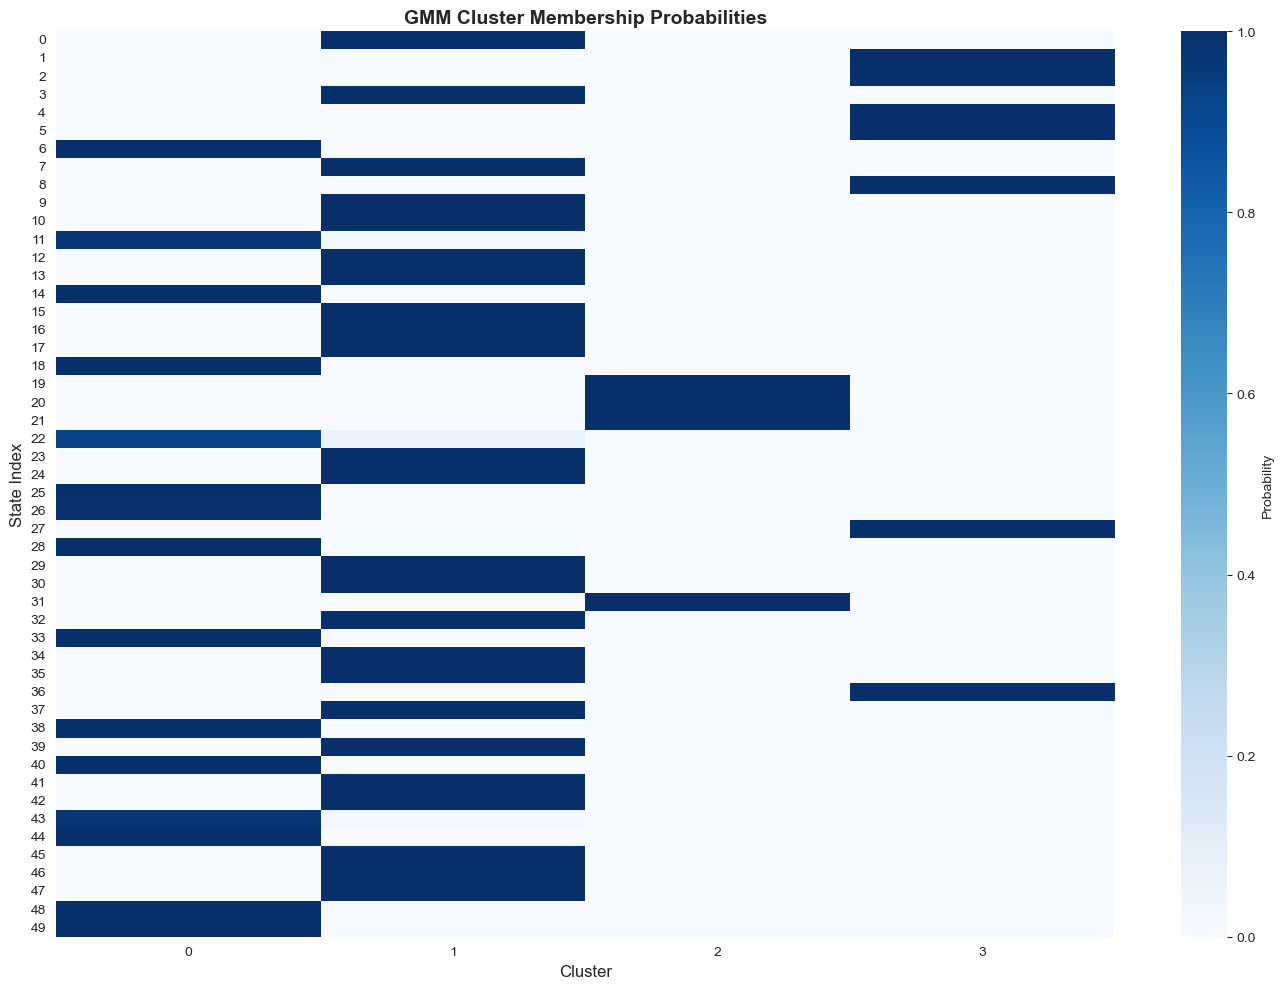

In [41]:
# Probability heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(gmm_probs, annot=False, cmap='Blues', cbar_kws={'label': 'Probability'})
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('State Index', fontsize=12)
plt.title('GMM Cluster Membership Probabilities', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Advanced Profiling & Comparison

In [42]:
# Compare all three methods
comparison_df = pd.DataFrame({
    'State': states,
    'K-Means': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'GMM': gmm_labels
})

print('Cluster Assignments Comparison:')
comparison_df

Cluster Assignments Comparison:


,State,K-Means,Hierarchical,GMM
0,Alabama,2,2,1
1,Alaska,0,0,3
2,Arizona,0,0,3
3,Arkansas,2,2,1
4,California,0,0,3
5,Colorado,0,0,3
6,Connecticut,3,3,0
7,Delaware,3,3,1
8,Florida,0,0,3
9,Georgia,2,2,1


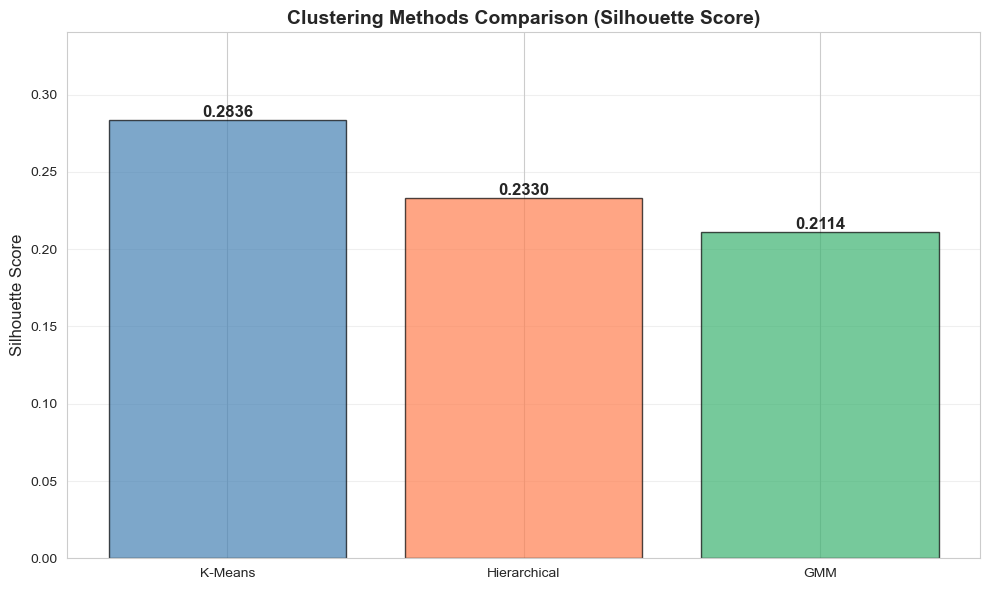


Silhouette Scores:
K-Means: 0.2836
Hierarchical: 0.2330
GMM: 0.2114


In [43]:
# Silhouette scores comparison
methods = ['K-Means', 'Hierarchical', 'GMM']
scores = [
    silhouette_score(X_scaled, kmeans_labels),
    silhouette_score(X_scaled, hierarchical_labels),
    silhouette_score(X_scaled, gmm_labels)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, scores, color=['steelblue', 'coral', 'mediumseagreen'], alpha=0.7, edgecolor='black')
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Clustering Methods Comparison (Silhouette Score)', fontsize=14, fontweight='bold')
plt.ylim(0, max(scores) * 1.2)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, score in zip(bars, scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nSilhouette Scores:')
for method, score in zip(methods, scores):
    print(f'{method}: {score:.4f}')

In [44]:
# Final summary
print('='*80)
print('FINAL SUMMARY')
print('='*80)
print(f'\nDataset: {len(states)} US states with {len(feature_names)} crime features')
print(f'Optimal number of clusters: {optimal_k}')
print(f'\nClustering Performance:')
print(f'  K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}')
print(f'  Hierarchical Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.4f}')
print(f'  GMM Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.4f}')
print(f'\nBest performing method: {methods[np.argmax(scores)]}')
print('='*80)

FINAL SUMMARY

Dataset: 50 US states with 7 crime features
Optimal number of clusters: 4

Clustering Performance:
  K-Means Silhouette Score: 0.2836
  Hierarchical Silhouette Score: 0.2330
  GMM Silhouette Score: 0.2114

Best performing method: K-Means
